In [1]:
from src import data_loader, features, model, evaluate, utils
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
config = yaml.safe_load(open("config/config.yaml"))

df = data_loader.load_data(config['data']['raw_path'])

df.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


# Pre-Processing

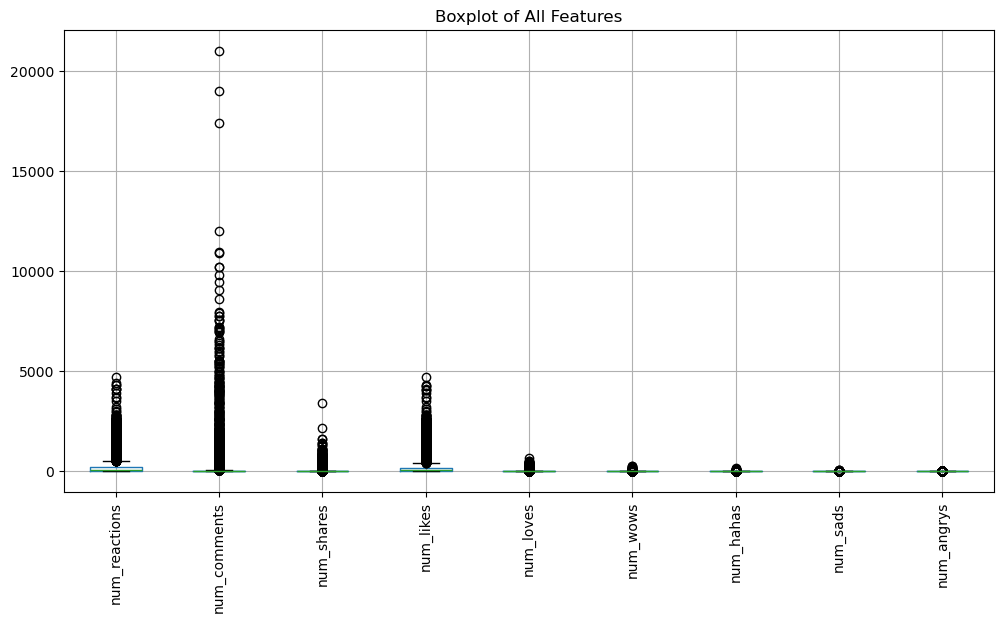

In [4]:
# Outlier detection - numeric columns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.boxplot(rot=90)

plt.title("Boxplot of All Features")
plt.show()

In [5]:
# Removing Outliers
df = features.remove_outliers_iqr(df)

In [6]:
# Cleaning the Data 
df['total_positive'] = df['num_likes'] + df['num_loves'] + df['num_wows'] + df['num_hahas'] + df['num_shares']
df['total_negative'] = df['num_sads'] + df['num_angrys']

df.drop(['num_shares', 'num_reactions', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'], axis=1, inplace=True)
df

,status_type,num_comments,total_positive,total_negative
1,photo,0,150,0
3,photo,0,111,0
23,video,0,18,0
25,video,0,38,0
75,video,1,35,0
...,...,...,...,...
7039,photo,0,7,0
7042,photo,0,4,0
7044,photo,0,86,0
7045,photo,0,89,0


In [7]:
# Target variables selection
X = df.drop('status_type', axis=1)
y = df['status_type']


In [8]:
# Encoding data
y = features.encode_features(df, df['status_type'])

In [9]:
# Scaling data
X_scaled = features.scale_features(X)
#pd.DataFrame(X_scaled).describe()

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KMeans - PCA

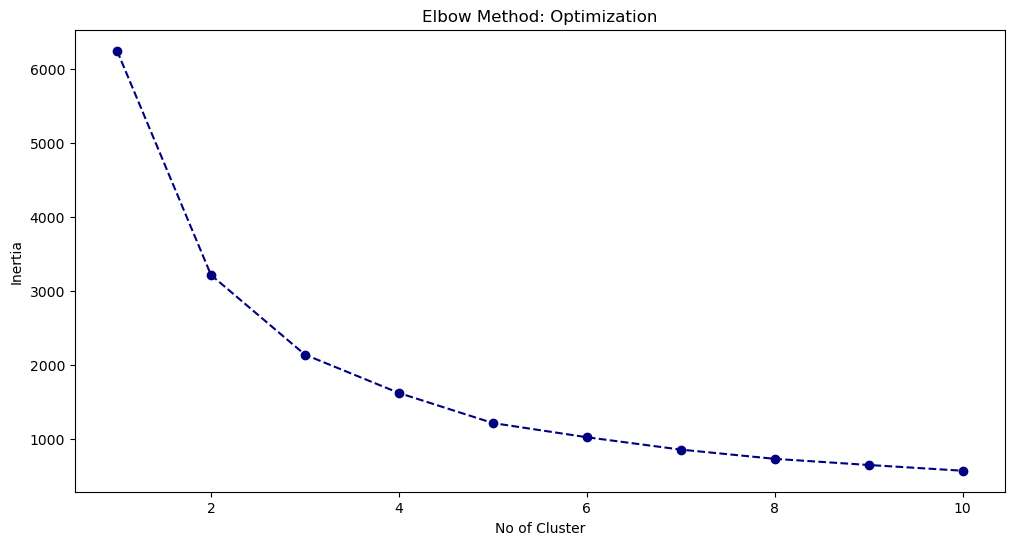

In [11]:
# Elbow Optimization
features.elbow(X_scaled, 11)

### 2 Cluster Model

In [12]:
# KMeans Clustering model - 2 Cluster
model_type = config['models']['KMeans']
model_obj = model.build_model(model_type['type'], model_type['params'][2])
km_model = model.train_model_KMeans(model_obj, X_scaled)

In [13]:
# Model Evaluation - 2 Cluster
evaluate.evaluate_km(km_model, X_scaled, y)

Accuracy: 0.6254 - 1953 out of 3123 labelled correct.

Silhouette Score: 0.6481


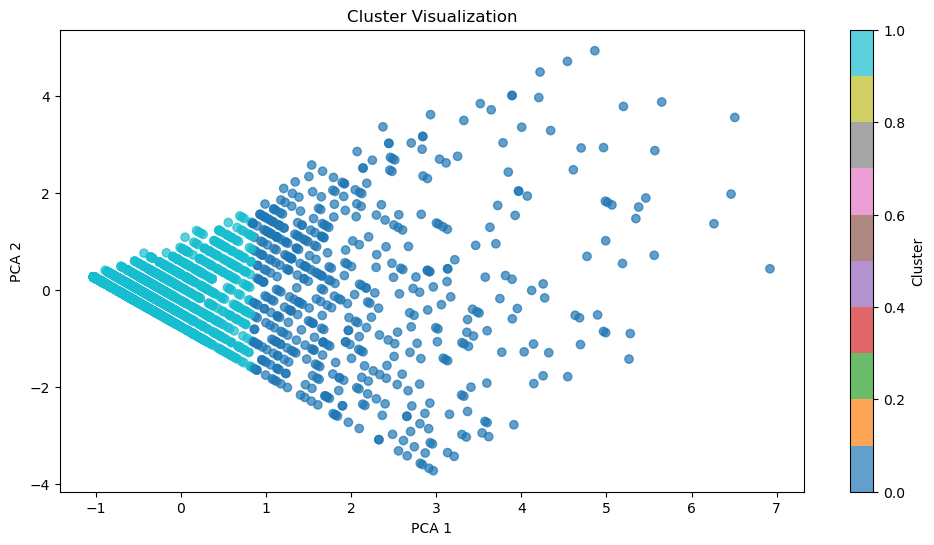

In [14]:
# PCA Visualization - 2 Cluster
utils.plot_clusters(km_model, X_scaled)

### 3 Cluster Model

In [15]:
# KMeans Clustering model - 3 Cluster
model_type = config['models']['KMeans']
model_obj = model.build_model(model_type['type'], model_type['params'][3])
km_model = model.train_model_KMeans(model_obj, X_scaled)

In [16]:
# Model Evaluation - 3 Cluster
evaluate.evaluate_km(km_model, X_scaled, y)

Accuracy: 0.6282 - 1962 out of 3123 labelled correct.

Silhouette Score: 0.6617


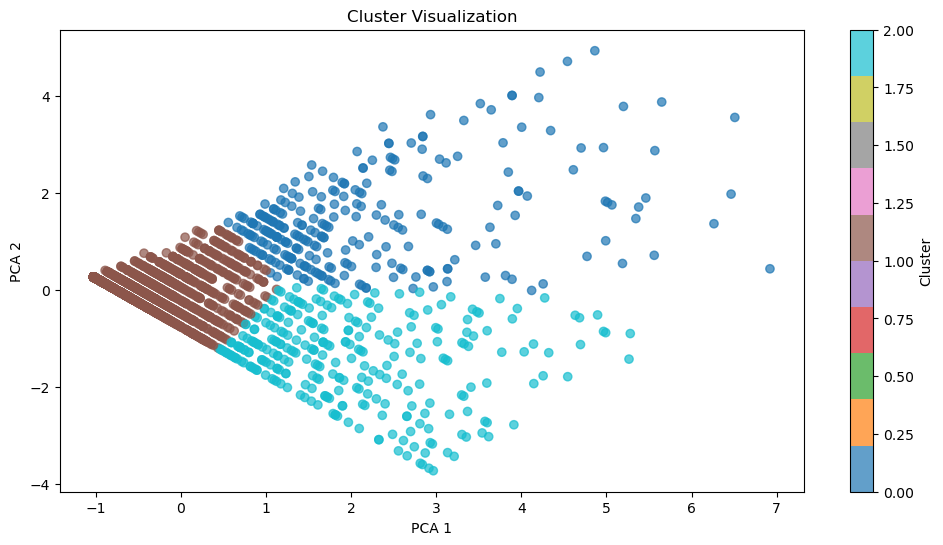

In [17]:
# PCA Visualization - 3 Cluster
utils.plot_clusters(km_model, X_scaled)

### 4 Cluster Model

In [18]:
# KMeans Clustering model 
model_type = config['models']['KMeans']
model_obj = model.build_model(model_type['type'], model_type['params'][4])
km_model = model.train_model_KMeans(model_obj, X_scaled)

In [19]:
# Model Evaluation - 4 Cluster
evaluate.evaluate_km(km_model, X_scaled, y)

Accuracy: 0.5632 - 1759 out of 3123 labelled correct.

Silhouette Score: 0.5644


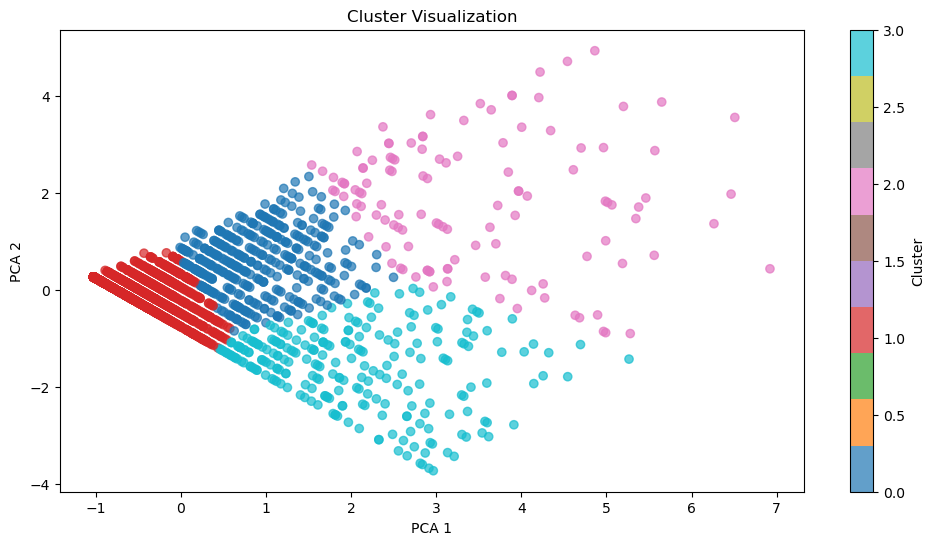

In [20]:
# PCA Visualization - 4 Cluster
utils.plot_clusters(km_model, X_scaled)

### 5 Cluster Model

In [21]:
# KMeans Clustering model - 5 Cluster
model_type = config['models']['KMeans']
model_obj = model.build_model(model_type['type'], model_type['params'][5])
km_model = model.train_model_KMeans(model_obj, X_scaled)

In [22]:
# Model Evaluation - 5 Cluster
evaluate.evaluate_km(km_model, X_scaled, y)

Accuracy: 0.5075 - 1585 out of 3123 labelled correct.

Silhouette Score: 0.5395


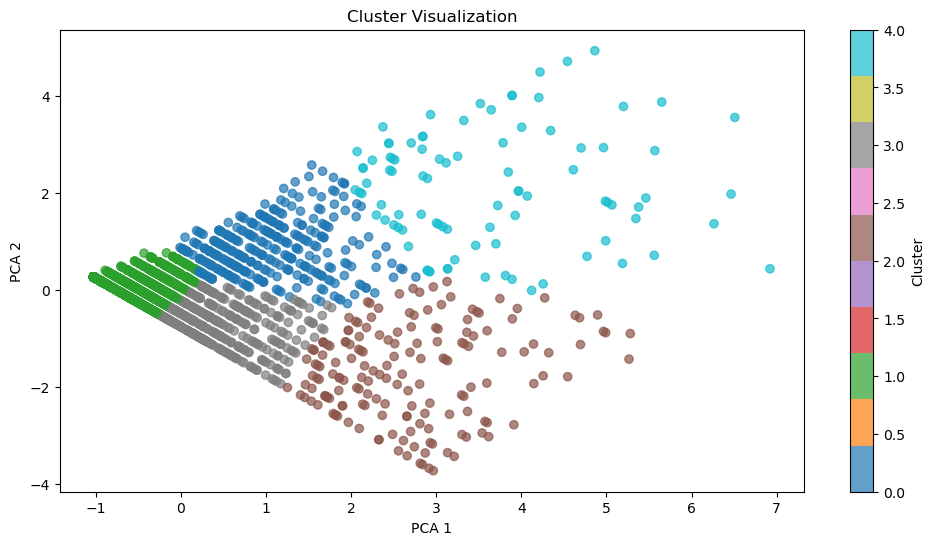

In [23]:
# PCA Visualization - 5 Cluster
utils.plot_clusters(km_model, X_scaled)

# Logistic Regression

In [24]:
# Logistic Regression model
model_type = config['models']['logistic_regressor']
model_obj = model.build_model(model_type['type'], model_type['params'])
logr_model = model.train_model(model_obj, X_train, y_train)

In [25]:
# Model Evaluation
evaluate.evaluate(logr_model, X_test, y_test)

LogisticRegression()
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.77      1.00      0.87       484
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       121

    accuracy                           0.77       625
   macro avg       0.19      0.25      0.22       625
weighted avg       0.60      0.77      0.68       625



# Random Forest

In [26]:
# Random Forest Classifier model
model_type = config['models']['random_forest']
model_obj = model.build_model(model_type['type'], model_type['params'])
rfc_model = model.train_model(model_obj, X_train, y_train)

In [27]:
# Model Evaluation
evaluate.evaluate(rfc_model, X_test, y_test)

RandomForestClassifier(max_depth=10, random_state=42)
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.86      0.87      0.86       484
           2       0.20      0.07      0.10        15
           3       0.50      0.52      0.51       121

    accuracy                           0.78       625
   macro avg       0.39      0.36      0.37       625
weighted avg       0.76      0.78      0.77       625

